In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [0]:
from keras import backend as K
from keras import backend
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import numpy as np
import os, shutil
from google.colab import drive
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import metrics
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from IPython.display import display 
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2 as cv
from os.path import join
import pandas as pd
import random
import tensorflow as tf
import random as rn
np.random.seed(42)
rn.seed(12345)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
tf.set_random_seed(1234)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
ls

gdrive/  sample_data/


In [0]:
!cp -r "/content/gdrive/My Drive/chest_xray_neat" "chest_xray_neat"

In [7]:
ls

chest_xray_neat/  gdrive/  sample_data/


In [0]:
base_dir = 'chest_xray_neat'

In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [0]:
train_bacteria_dir = os.path.join(train_dir, 'bacteria')
train_virus_dir = os.path.join(train_dir, 'virus')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

val_bacteria_dir = os.path.join(val_dir, 'bacteria')
val_virus_dir = os.path.join(val_dir, 'virus')
val_normal_dir = os.path.join(val_dir, 'NORMAL')

test_bacteria_dir = os.path.join(test_dir, 'bacteria')
test_virus_dir = os.path.join(test_dir, 'virus')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [11]:
print('train bacteria:', len(os.listdir(train_bacteria_dir)))
print('train virus:', len(os.listdir(train_virus_dir)))
print('train normal:', len(os.listdir(train_normal_dir)))


print('validation bacteria:', len(os.listdir(val_bacteria_dir)))
print('validation virus:', len(os.listdir(val_virus_dir)))
print('validation normal:', len(os.listdir(test_normal_dir)))


print('test bacteria:', len(os.listdir(test_bacteria_dir)))
print('test virus:', len(os.listdir(test_virus_dir)))
print('test normal:',len(os.listdir(test_normal_dir)))

train bacteria: 2039
train virus: 1000
train normal: 1000
validation bacteria: 500
validation virus: 345
validation normal: 234
test bacteria: 242
test virus: 148
test normal: 234


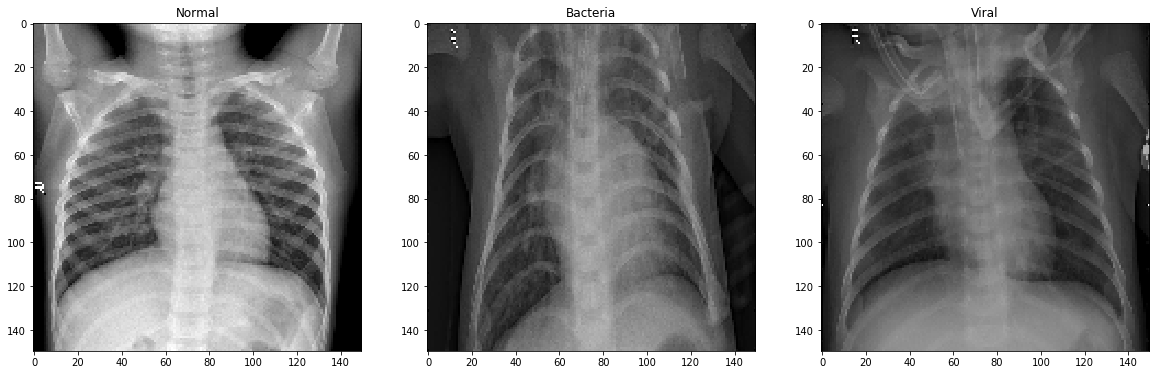

In [12]:
#plt.imshow(img(os.listdir(train_bacteria_dir)[1]))
#img = image.load_img(os.path.join(train_bacteria_dir, os.listdir(train_bacteria_dir)[1]), target_size=(150,150))
#imgplot = plt.imshow(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 20)
ax1.imshow(image.load_img(os.path.join(train_normal_dir, os.listdir(train_normal_dir)[1]), target_size=(150,150)))
ax1.set_title('Normal')
ax2.imshow(image.load_img(os.path.join(train_bacteria_dir, os.listdir(train_bacteria_dir)[1]), target_size=(150,150)))
ax2.set_title('Bacteria')
ax3.imshow(image.load_img(os.path.join(train_virus_dir, os.listdir(train_virus_dir)[1]), target_size=(150,150)))
ax3.set_title('Viral')
plt.show()

Found 4038 images belonging to 3 classes.
Found 1195 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Epoch 1/50
378/378 [==============================] - 191s 507ms/step - loss: 1.3890 - categorical_accuracy: 0.5656 - val_loss: 1.7235 - val_categorical_accuracy: 0.3193
Epoch 2/50
378/378 [==============================] - 194s 513ms/step - loss: 0.7789 - categorical_accuracy: 0.6491 - val_loss: 1.8141 - val_categorical_accuracy: 0.3697
Epoch 3/50
378/378 [==============================] - 194s 512ms/step - loss: 0.7215 - categorical_accuracy: 0.6820 - val_loss: 0.8495 - val_categorical_accuracy: 0.6285
Epoch 4/50
378/378 [==============================] - 191s 505ms/step - loss: 0.6892 - categorical_accuracy: 0.7027 - val_loss: 1.0905 - val_categorical_accuracy: 0.5615
Epoch 5/50
378/378 [==============================] - 188s 499ms/step - loss: 0.6669 - categorical_accuracy: 0.7136 - val_loss: 2.0674 - val_categorical_accuracy: 0.4523
Epoch 6/50
378/378 [=====

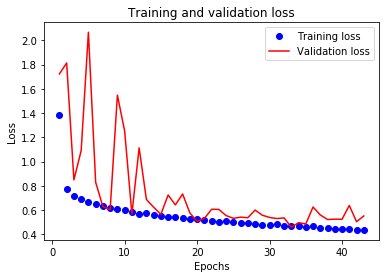

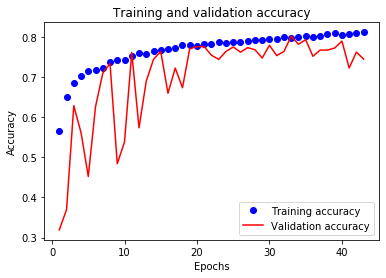

test_acc: 0.8397435897435898


In [54]:
batch_size = 32
num_of_train_samples = 4038 
num_of_validation_samples = 1195 
num_of_test_samples = 624 

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True,
    seed = 42)

validataion_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True,
    seed = 42)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False,
    seed = 42)

backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'elu', input_shape = (150, 150, 3)))
model.add(layers.Conv2D(32, (3,3), activation = 'elu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation = 'elu'))
model.add(layers.Conv2D(64, (3,3), activation = 'elu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), activation = 'elu'))
model.add(layers.Conv2D(128, (3,3), activation = 'elu'))
model.add(layers.Conv2D(128, (3,3), activation = 'elu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3,3), activation = 'elu'))
model.add(layers.Conv2D(512, (3,3), activation = 'elu'))
model.add(layers.Conv2D(512, (3,3), activation = 'elu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='elu'))
model.add(BatchNormalization())
model.add(layers.Dense(512, activation='elu'))
model.add(BatchNormalization())
model.add(layers.Dense(512, activation='elu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer = optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
               loss = 'categorical_crossentropy',
               metrics = [metrics.categorical_accuracy])


history = model.fit_generator(
    train_generator,
    steps_per_epoch=num_of_train_samples*3 // batch_size,
    epochs=50,
    validation_data=validataion_generator,
    validation_steps=num_of_validation_samples // batch_size,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_categorical_accuracy', patience=10, restore_best_weights = True)],
    use_multiprocessing=False)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate_generator(test_generator, steps = num_of_test_samples // batch_size+1)
print('test_acc:', test_acc)

model.save('pneumonia.h5')

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
#test_generator.reset()
Y_pred = model.predict_generator(test_generator)#, steps = num_of_test_samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=-1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes[test_generator.index_array], y_pred))
print('Classification Report')
target_names = test_generator.class_indices
print(classification_report(test_generator.classes[test_generator.index_array], y_pred, target_names=target_names))


Confusion Matrix
[[209   0  25]
 [  8 195  39]
 [ 15  13 120]]
Classification Report
              precision    recall  f1-score   support

      NORMAL       0.90      0.89      0.90       234
    bacteria       0.94      0.81      0.87       242
       virus       0.65      0.81      0.72       148

    accuracy                           0.84       624
   macro avg       0.83      0.84      0.83       624
weighted avg       0.86      0.84      0.84       624

